## **Context**
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer) except for dealership level discounts which come into play only in the last stage of the customer journey. Used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.


### **The objectives:**
* Explore and visualize the dataset.
* Build a model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.


### **The key questions:**
* Which factors would affect the price of used cars?

### **The problem formulation**:
We have a regression problem at hand where we will try to predict the price of used cars based on several factors such as - Year of manufacturing, Number of seats, Mileage of car, etc.


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# Loading libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries to build linear model for statistical analysis and prediction
#import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn import metrics

#for tuning the model
from sklearn.model_selection import GridSearchCV

In [3]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [4]:
sns.set(font_scale=1.025, rc={'figure.figsize': (10, 6),
                              'axes.facecolor': '#f2f2f0',
                              'axes.edgecolor': '#f2f2f0',
                              'figure.facecolor': '#f2f2f0', 
                              'grid.color': '#c4c4c4', 
                              'grid.linewidth': 0.5,
                              'lines.linewidth': 1.5,
                              'text.color': '#000000',
                              'xtick.color': '#000000',
                              'ytick.color': '#000000'})

### Loading and exploring the data

Loading the data into python to explore and understand it.

In [5]:
data = pd.read_csv("..\\Public_Datasets\\used_cars.csv")

### First and last 5 rows of the dataset.

In [6]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [7]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### Observations
* `S.No.` looks like an index for the data entry and such a column would not be useful for our analysis and we can drop it.

* `Car names` contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.


* `New_Price` and our target variable `Price` have missing values.

In [8]:
# removing S.No. column from data
data.drop(['S.No.'],axis=1,inplace=True)

### Checking data types and missing values for each column

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [10]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### Observations
*  All columns have correct data types.
* `Name`,`Location`, `Year`, `Kilometers_Driven`,`Fuel_Type`,`Transmission`,`Owner_Type` columns have no missing values
* `Mileage`,`Engine`,`Power`,`Seats`,`New_price`,`Price` columns have missing values

## Exploratory Data Analysis

### summary statistics of the dataset

In [11]:
# Basic summary stats - Numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations**
* **Manufacturing year of cars** varies from 1996 to 2019
* **At least 50% of the cars have 53416 kilometers_driven**, however there are some extreme values, seeing as the minimum value is 171 km and maximum value as 6500000 km. We should check the extreme values to get a sense of the data.
* **Average number of seat is around 5**
* **Average selling price of a used car is 9.47 lakh.** At least 50% of cars have sold for 9.9 lakh or less, with the maximum selling price being 160 lakh.
* **Atleast 75% used cars have as 21 km or less** with the maximum value as 33.5 km. But minimum Mileage being 0 is also concerning, we will have to check what is going on.
* The **mean new_price** is **22.77 lakh**, whereas **the median of the new_price** is **11.57 lakh**. This indicates that the new_price distribution is skewed towards the right side and explains that there are only a few very high range brands, which again makes sense.

In [12]:
# Basic summary stats - Categorical variables
data.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [13]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Maruti Ertiga ZDI Plus                    1
Skoda Octavia L and K 1.9 TDI MT          1
Ford EcoSport 1.5 Ti VCT MT Signature     1
Hyundai Tucson 2.0 e-VGT 2WD AT GLS       1
Maruti Wagon R VXI AMT Opt                1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Nam

#### Observations
* There are 2041 unique cars in our data.
* Most cars are from Mumbai and Hyderabad.
* Most of the cars have a manual transmission.
* Most cars have first owners.
* Very few cars in CNG, LPG, Electric Fuel_Type

**Check Kilometers_Driven extreme values**

We observed from summary statistics that kilometers_driven has extreme values . We will check that column 

In [14]:
data.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### Observations
* In the first row. A car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

* The other observations that follow are also on a higher-end but kilometers driven by these cars are still reasonable as they are pretty old cars. There is a good chance that these are outliers, We will look at this further while doing the univariate analysis.

In [15]:
# Removing this specific row from the above observation
data.drop(2328,inplace=True)

**Check Mileage extreme values**

We also observed from summary statistics that minimum mileage is zero. We will check that column

In [16]:
data.sort_values(by=['Mileage'], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### Observations
* Mileage of cars can not be 0
* we should treat 0's as missing values.

## Univariate analysis
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

## 1.Univariate anaysis - Numerical data
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns, `Kilometers_driven`,`power`,`price`,`mileage`

In [17]:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='coral') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--', label='Mean') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='k', linestyle='-', label='Median') # Add median to the histogram
    ax_hist2.legend()
    
### Box plot and Histogram for Kilometers Driven

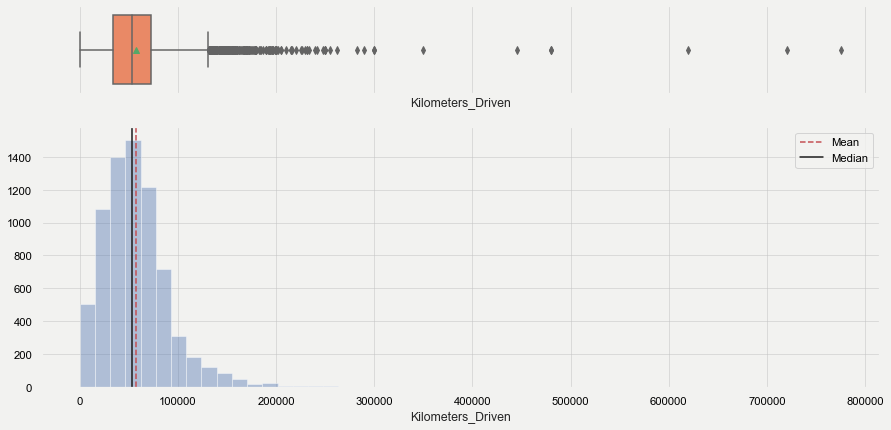

In [18]:
histogram_boxplot(data['Kilometers_Driven'])

* Kilometers_Driven is highly right-skewed. It is very difficult to interpret. Log transformation can be used to reduce/remove the skewness. Log transformed value can be used for analysis

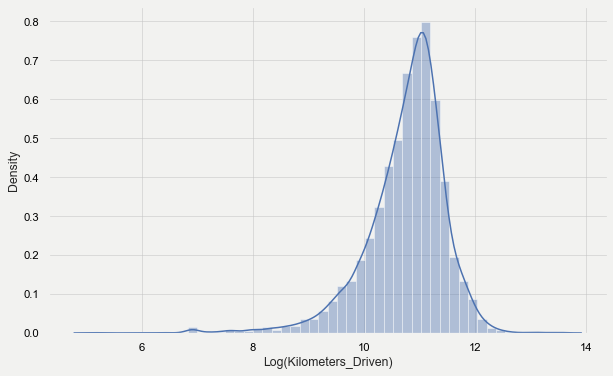

In [19]:
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### Observations
* Log transformation of data has reduced the extreme skewness.
* From box-plot we can see the outliers, as we discussed in summary statistics

In [20]:
### Adding a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

### Box plot and Histogram for Mileage

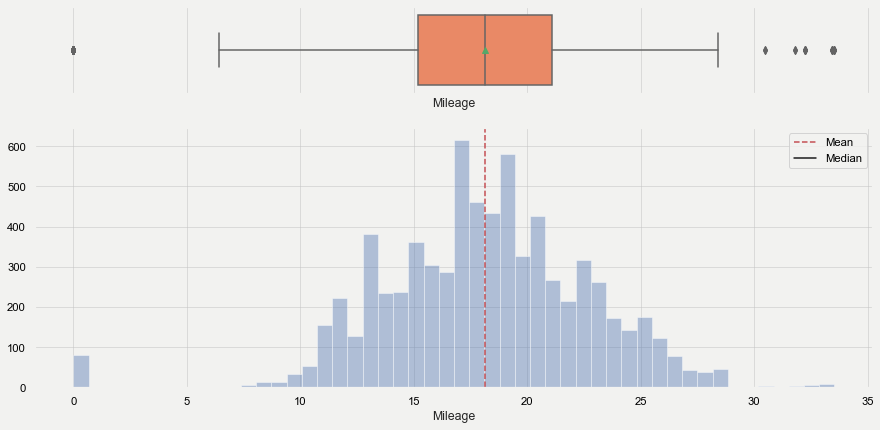

In [21]:
histogram_boxplot(data['Mileage'])

#### Observation
* The distribution of mileage looks fairly normally distributed if we ignore the cars with 0 mileage.
* From box plot also it is visible that the extreme values can be seen as outliers

### Box plot and Histogram for Power

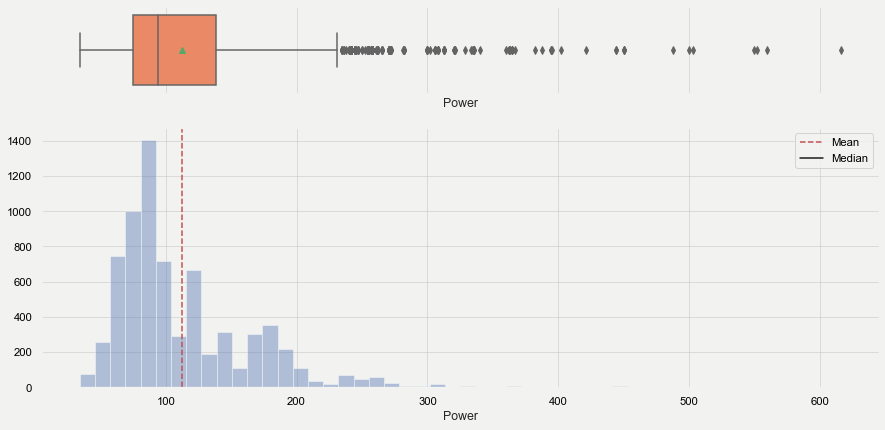

In [22]:
histogram_boxplot(data['Power'])

#### Observations
* Most cars have Power of engines between 90-100 bhp.
* From the boxplot, we can see that there are many outliers in this variable -  cars with more than 250 bhp are being considered as outliers in data.

### Box plot and Histogram for Price

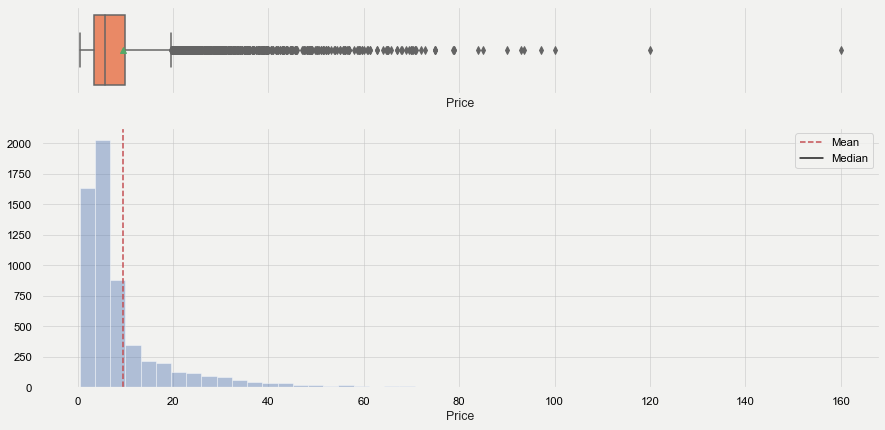

In [23]:
histogram_boxplot(data['Price'])

* The distribution of Price is highly skewed, we can use log transformation on this column to see if that helps normalize the distribution.

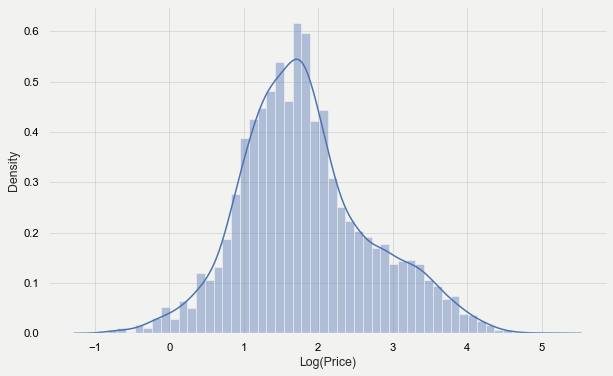

In [24]:
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

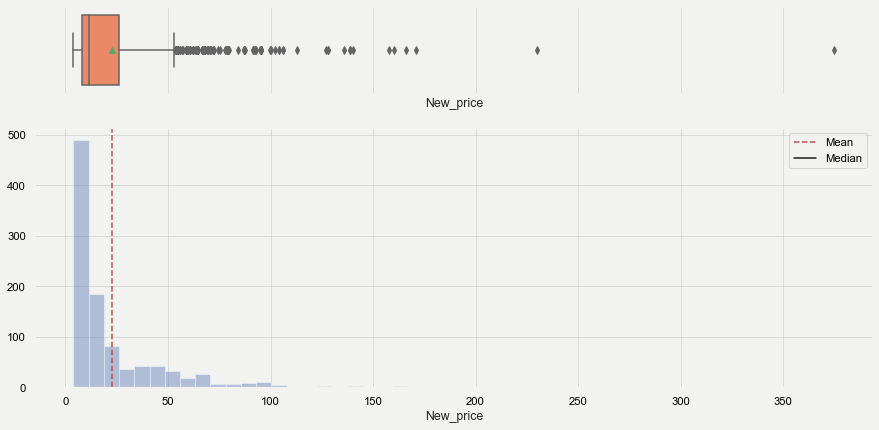

In [25]:
histogram_boxplot(data['New_price'])

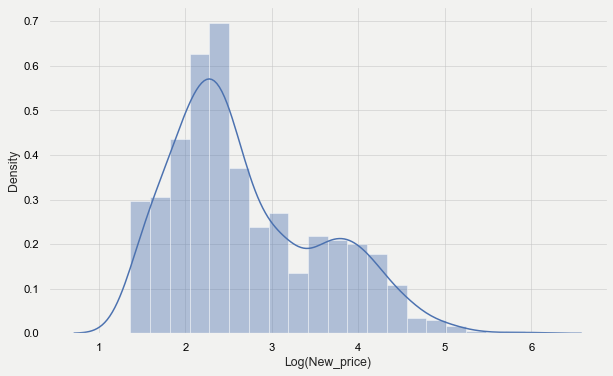

In [26]:
sns.distplot(np.log(data["New_price"]), axlabel="Log(New_price)");

#### Observations
* Log transformation helps to normalize the distribution
* It is observed that few extreme price values are there as we seen in summary statistics

In [27]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
data["price_log"] = np.log(data["Price"])

## 2.Univariate anaysis - Categorical data

In [28]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Barplot for Location

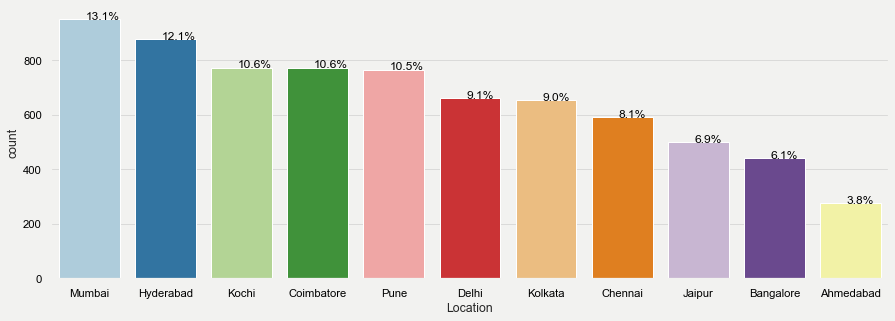

In [29]:
perc_on_bar('Location')

#### Observations
* 13.1% of the cars are from Mumbai followed by 12.1% of the cars from Hyderabad.

### Barplot for Year

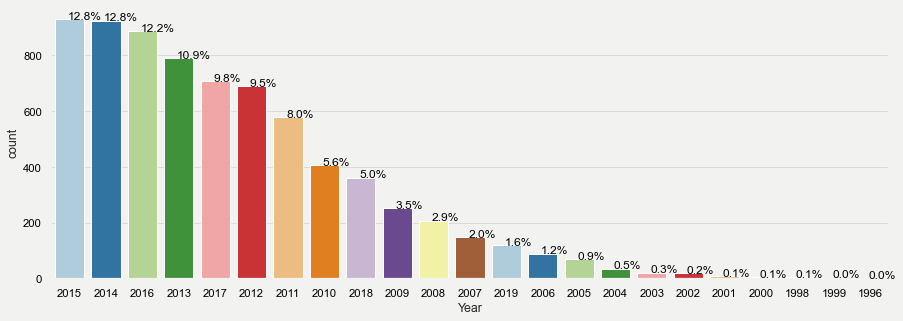

In [30]:
perc_on_bar('Year')

#### Observations
* About 38% of the cars are in are data are for the year 2014 - 2016.

### Barplot for Fuel_Type

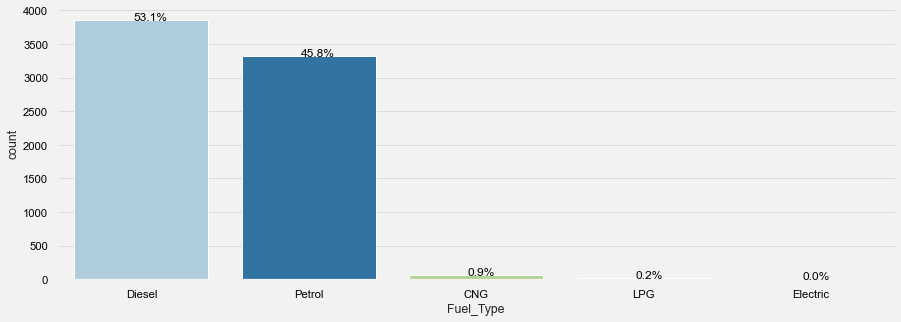

In [31]:
perc_on_bar('Fuel_Type')

#### Observations
* About 99% of the cars run on Diesel and Petrol while the rest 1% cars run on CNG, LPG and electric.

### Barplot for Transmission

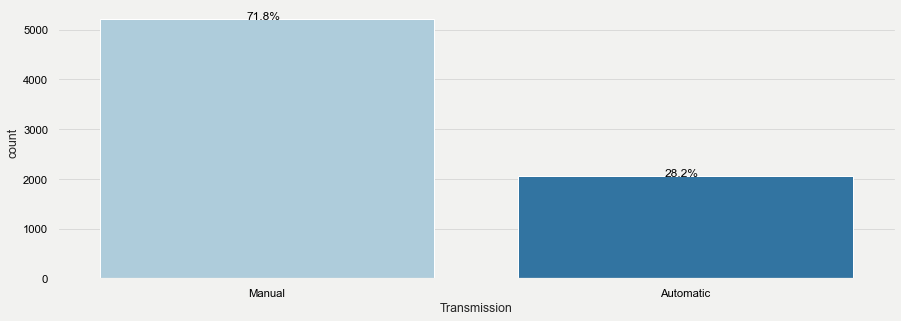

In [32]:
perc_on_bar('Transmission')

#### Observations
* 71.7% of the cars have a manual transmission.

### Barplot for Owner_Type

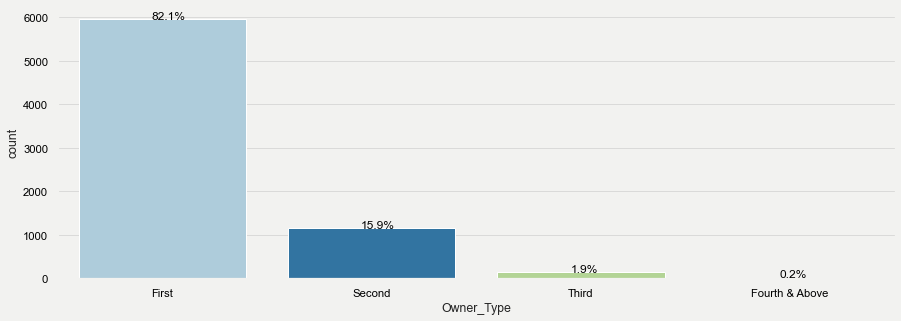

In [33]:
perc_on_bar('Owner_Type')

#### Observations
* 82% of the cars have first owners followed by 15.9% of the cars with second owners.

## Bivariate Analysis

### Utility Functions

In [34]:
def triag_corr(df: pd.DataFrame, fig_xy: list = [13,10], cmap: str = 'rocket', annot: bool = True, annot_s: int = 8, 
               fmt: str = ".3%", abs_: bool = False, method: str = 'pearson') -> plt.figure:
    plt.figure(figsize=(fig_xy[0], fig_xy[1]))
    corr = df.corr(method=method).abs() if abs_ else df.corr(method=method)
    mask = np.tri(*corr.shape).T 
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=annot, annot_kws={"size":annot_s}, fmt=fmt)
    plt.show()
    
def get_redundant_pairs(df: pd.DataFrame) -> set:
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def mu_std_corr_matrix(corr: pd.DataFrame or np.array, rnd: int = 3):
    corr = corr.abs().copy()
    corr.values[np.tril_indices_from(corr)] = np.nan     
    return (round(corr.unstack().mean(),rnd), round(corr.unstack().std(),rnd))

def get_top_abs_correlations(df: pd.DataFrame, n: int = 5) -> pd.Series:
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)\
                     .to_frame().rename(columns={0:'Correlation'}).rename_axis(['X', 'y'])
    return au_corr[0:n]

### 1. Pair plot
A pairs plot allows us to see both distribution of single variables and relationships between two variables

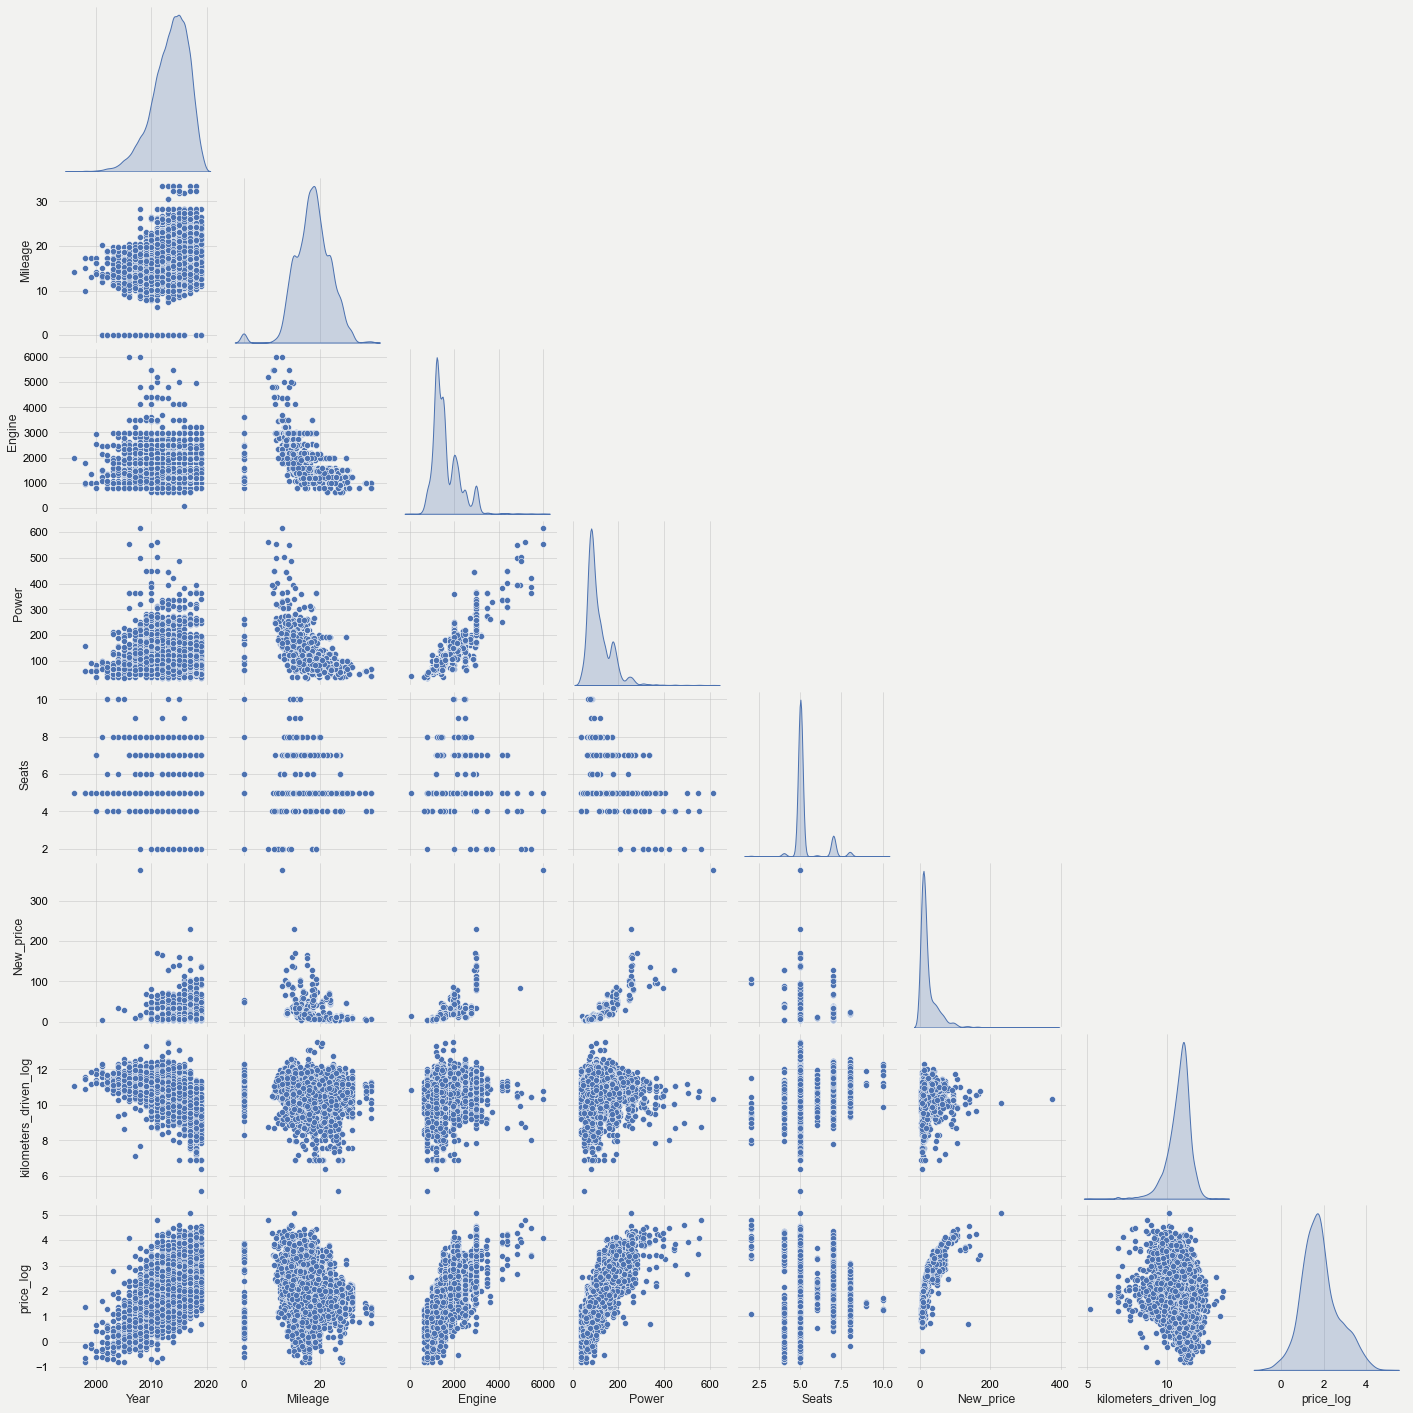

In [35]:
#We can include the log transformation values and drop the original skewed data columns
sns.pairplot(data.drop(['Kilometers_Driven','Price'],axis=1), diag_kind='kde', corner=True);

**Observations-**

Zooming into these plots gives us a lot of information - 

* Contrary to intuition **Kilometers Driven** have **no relationship** with price.
* Price has a **positive relationship with Year**. Newer the car, the higher the price.
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
* Mileage does not seem to show much relationship with the price of used cars.
* **Engine displacement and Power** of the car have a **positive relationship** with the price.
* **New Price** and Used Car Price are also **positively correlated**, which is expected.
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
* Mileage and power of newer cars is increasing owing to advancement in technology.
* **Mileage** has a **negative correlation** with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### 2. Heat map
Heat map shows a 2D correlation matrix between two discrete features

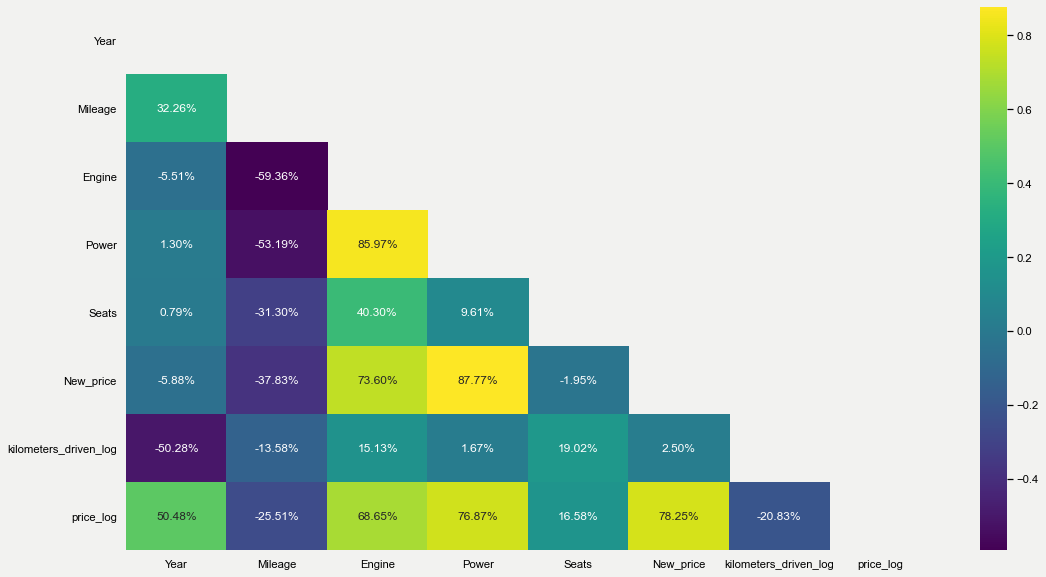

In [36]:
triag_corr(
    df=data.drop(['Kilometers_Driven','Price'],axis=1), 
    fig_xy=[18,10],
    abs_=False,
    cmap='viridis',
    method='pearson',
    fmt='.2%',
    annot_s=12
)

In [37]:
mu_abs_corr, std_abs_corr = mu_std_corr_matrix(corr=data.drop(['Kilometers_Driven','Price'],axis=1).corr(), rnd=3)
top_abs_corrs = get_top_abs_correlations(
    data.drop(['Kilometers_Driven','Price'],axis=1).select_dtypes(include=np.number), 
    20
)
top_abs_corrs.head()

,,Correlation
X,y,
Power,New_price,0.877708
Engine,Power,0.859657
New_price,price_log,0.782500
Power,price_log,0.768698
Engine,New_price,0.735981


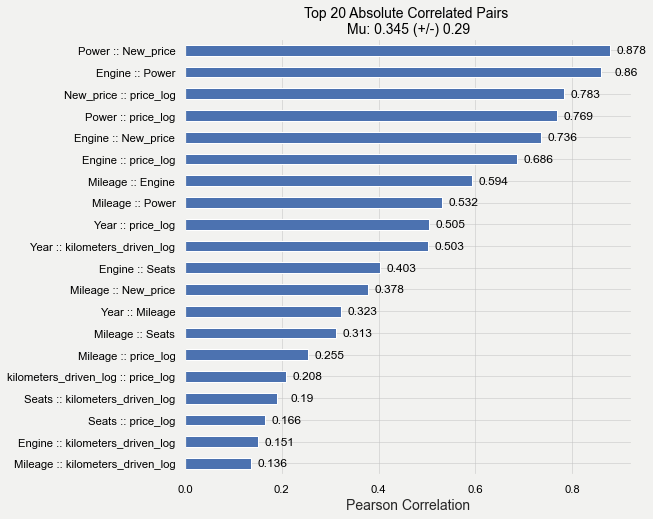

In [38]:
abs_corrs_idx = [str(i)+' :: '+str(x) for i, x in zip(top_abs_corrs.index.droplevel(1), top_abs_corrs.index.droplevel(0))]
top_abs_corrs = pd.DataFrame(top_abs_corrs.values, index=abs_corrs_idx, columns=['Correlation'])

fig, ax = plt.subplots(figsize=(8,8))
top_abs_corrs.sort_values('Correlation').plot(kind='barh', ax=ax, legend=False)
for i, v in enumerate(top_abs_corrs.sort_values('Correlation').values):
    ax.text(x=v + 0.075, y=i, s=str(round(v[0],3)), fontweight='medium', fontsize=12, 
        va='center', ha='right')
plt.title(f'Top 20 Absolute Correlated Pairs \nMu: {mu_abs_corr} (+/-) {std_abs_corr}', fontsize=14)
plt.xlabel('Pearson Correlation', fontsize=14);

* Power and engine are important predictors of price.
* New_price is also a significant predictor of price.

### 3. Box plot

In [39]:
### function to plot boxplot w.r.t Price
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

### Box Plot:Price vs Location

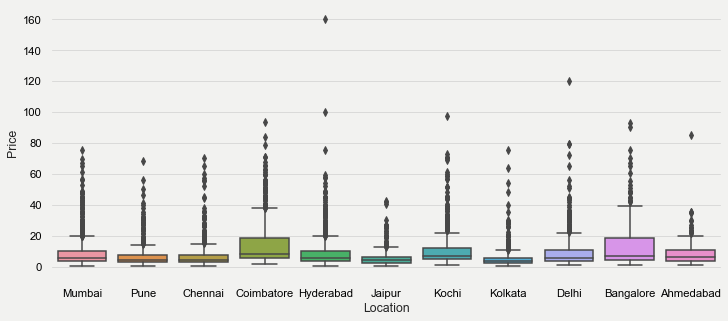

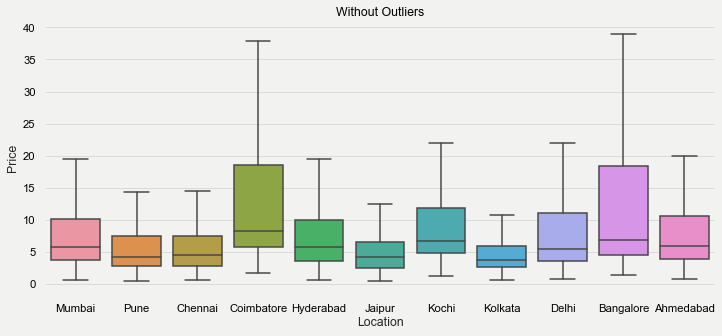

In [40]:
boxplot(data['Location'])

#### Observations
* Price of used cars has a large IQR in Coimbatore and Bangalore

### Box Plot:Price vs Fuel_Type

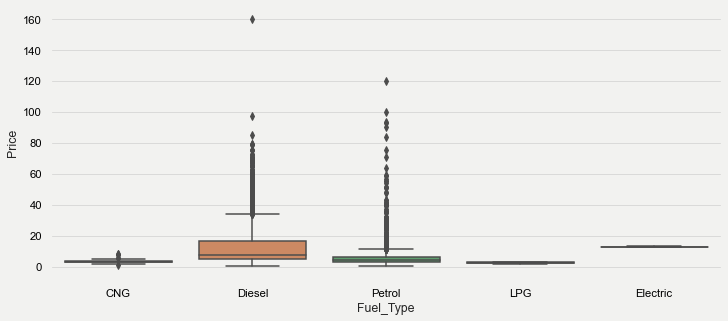

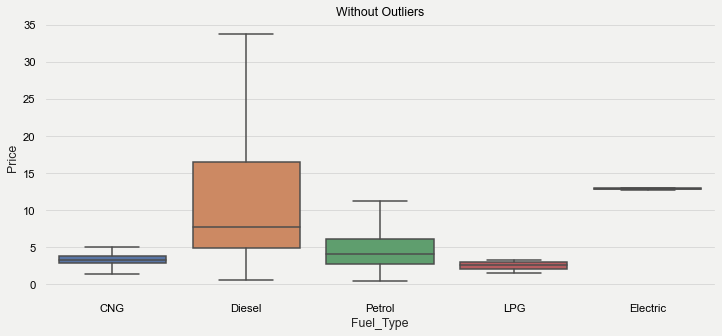

In [41]:
boxplot(data['Fuel_Type'])

#### Observations
* Diesel cars are costlier than Petrol cars.
* Electric cars are costlier than CNG and LPG cars.

### Box Plot:Price vs Transmission

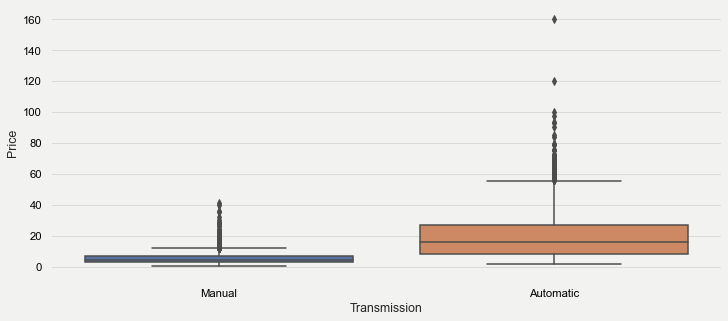

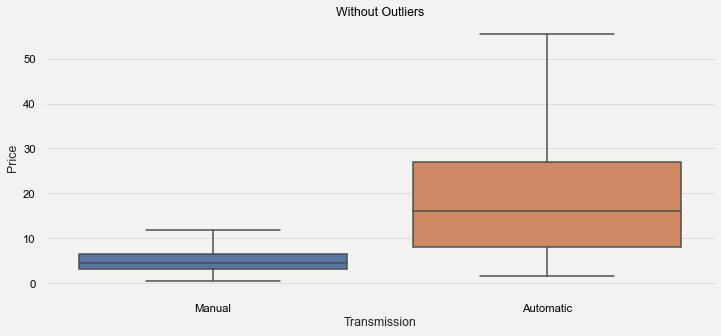

In [42]:
boxplot(data['Transmission'])

#### Observations
* Automatic transmission cars are very costly as compared to cars with manual transmission.

### Box Plot:Price vs Owner_Type

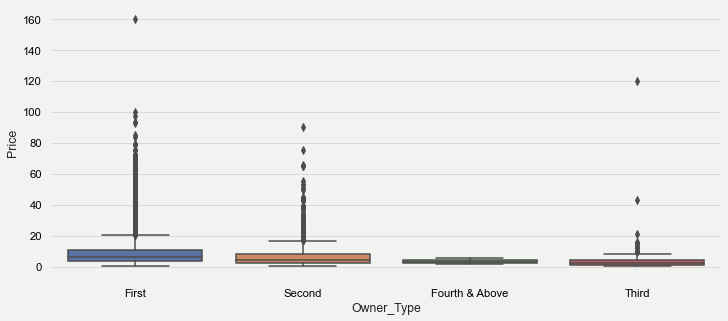

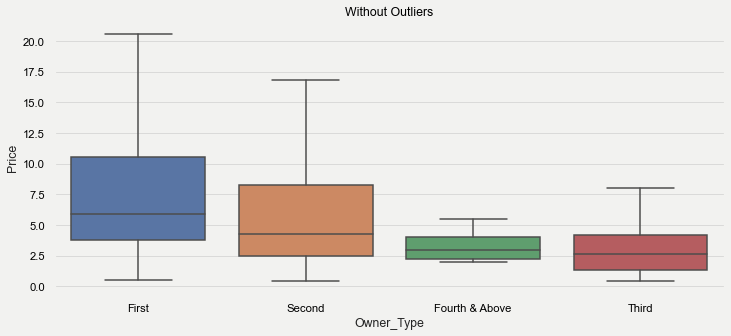

In [43]:
boxplot(data['Owner_Type'])

#### Observations
* Cars with fewer owners have higher prices, outliers in third owner cars these might be the luxury cars.

### Feature engineering

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction.

In [44]:
data["Name"].nunique()

2041

* With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information and see if that reduces the number of levels for this information.

#### 1. Car Brand Name

In [45]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
lamborghini         1
ambassador          1
smart               1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

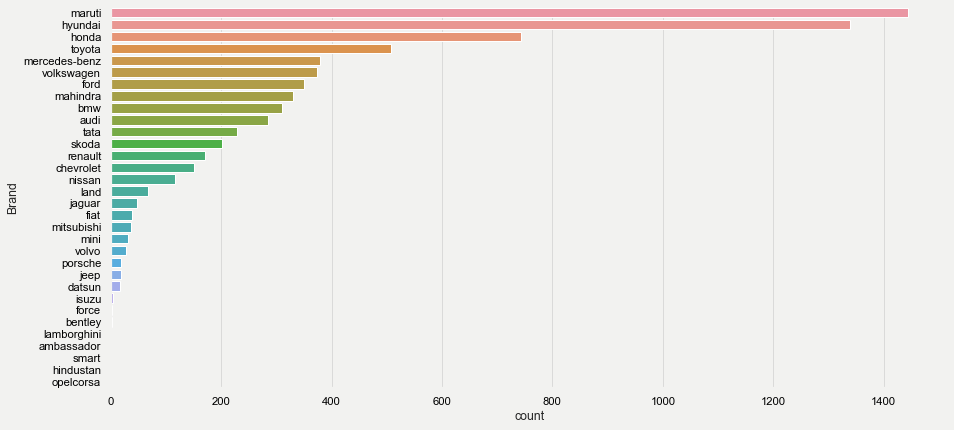

In [46]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Brand", data=data, order=data["Brand"].value_counts().index)
plt.show()

#### Observations
* Most frequent brand in our data is Maruti and Hyundai.

#### 2. Car Model Name

In [47]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
data["Model"].value_counts()

swift          418
city           318
i20            303
innova         203
verna          200
              ... 
mu               1
boxster          1
mustang          1
continental      1
abarth           1
Name: Model, Length: 218, dtype: int64

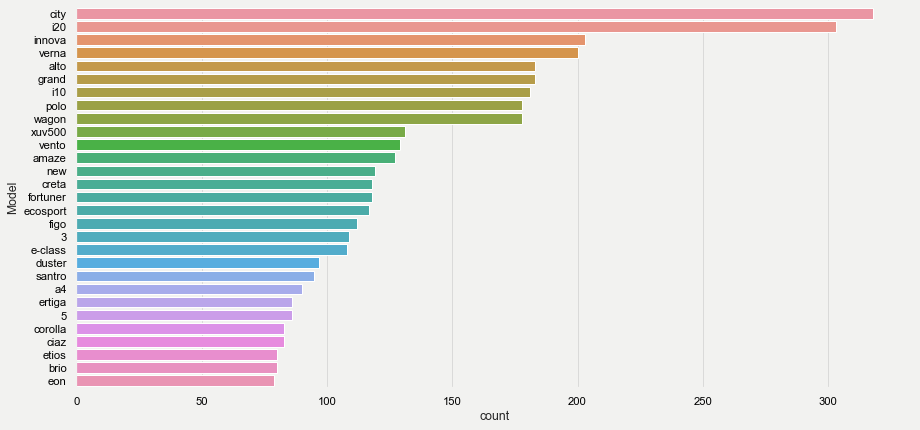

In [48]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Model", data=data, order=data["Model"].value_counts().index[1:30]);

#### Observations
* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.
* we have extracted brand name and model name, we get a better understanding of the cars we have in our data

In [49]:
data.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.093684
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

#### Observations
* The output is very close to our expectation (domain knowledge), in terms of brand order. The mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in descending order.

* Towards the bottom end we have more budget friendly brands.

* We can see that there is some missingness in our data which we will treat further.

### Missing value treatment.

In [50]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

#### Observations
* Engine displacement information of 46 observations is missing and a maximum power of 175 entries is missing.
* Information about the number of seats is not available for 53 entries.
* New Price as we saw earlier has a huge missing count. 
* Price is also missing for 1234 entries. Since price is the response variable that we want to predict, we will have to drop these rows when we actually build a model.

**Missing values in Seats**

In [51]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,honda,city


In [52]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
data.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [53]:
# Impute missing Seats
data["Seats"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [54]:
data['Seats'].isnull().sum()

3

In [55]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,maruti,estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,0.916291,maruti,estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,0.559616,maruti,estilo


In [56]:
# Maruti Estilo can accomodate 5
data["Seats"] = data["Seats"].fillna(5.0)

In [57]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

**Missing values for Mileage**

In [58]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,toyota,prius


In [59]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,toyota,prius


#### Observations
* 2 Electric car variants don't have entries for Mileage.

In [60]:
# Impute missing Mileage
data["Mileage"].fillna(data['Mileage'].median(),inplace=True)

In [61]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

**Missing values for Engine**

In [62]:
# Impute missing Engine
data["Engine"].fillna(data['Engine'].median(),inplace=True)

**Missing values for Power**

In [63]:
# Impute missing Power
data["Power"].fillna(data['Power'].median(),inplace=True)

**Missing values for New_price**

In [64]:
# Impute missing New_price
data["New_price"].fillna(data['New_price'].median(),inplace=True)

In [65]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

In [66]:
# Drop the rows where 'Price' == NaN
cars_data = data[data["Price"].notna()]

In [67]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

#### Observations
* All missing values have been treated.

## **Proposed approach**


**Potential techniques** :

 Since it is a regression problem we will first start with the parametric model - linear regression,Ridge Regression followed by the non-parametric models - Decision Tree and Random Forest.


**Overall solution design** : 

The potential solution design would look like:
* Checking the data description to get the idea of basic statistics or summary of data.
* Univariate analysis to see how data is spread out, getting to about the outliers.
* Bivariate analysis to see how different attributes vary with the dependent variable.
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the luxurious cars and in real world scenarios such cars would appear in data and we would want our predictive model to capture the underlying pattern for them.
* Missing value treatment using appropriate techniques.
* Feature engineering - transforming features, creating new features if possible.
* Choosing the model evaluation technique - 1) R Squared 2) RMSE , can be any other metrics related to regression analysis.
* Splitting the data and proceeding with modelling.
* Model tuning to see if the performance of the model can be improved further.



**Measures of success** :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.


### Model Building

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modelling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### Split Data

In [68]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6018 non-null   object 
 1   Location               6018 non-null   object 
 2   Year                   6018 non-null   int64  
 3   Kilometers_Driven      6018 non-null   int64  
 4   Fuel_Type              6018 non-null   object 
 5   Transmission           6018 non-null   object 
 6   Owner_Type             6018 non-null   object 
 7   Mileage                6018 non-null   float64
 8   Engine                 6018 non-null   float64
 9   Power                  6018 non-null   float64
 10  Seats                  6018 non-null   float64
 11  New_price              6018 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  6018 non-null   float64
 14  price_log              6018 non-null   float64
 15  Bran

In [67]:
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'],axis=1)
X = pd.get_dummies(X, drop_first=True)
y = cars_data[["price_log", "Price"]]

In [68]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4212, 264) (1806, 264)


In [188]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    # red_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    # pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['price_log'], pred_train)
    test_r2=metrics.r2_score(y_test['price_log'], pred_test)
    train_rmse=metrics.mean_squared_error(y_train['price_log'], pred_train,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['price_log'], pred_test,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['price_log'],pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test['price_log'],pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['price_log'],pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['price_log'],pred_test)))
    
    # returning the list with train and test scores
    return score_list

### Fitting a linear model

In [189]:
lr = LinearRegression(n_jobs=-1)

In [190]:
lr.fit(X_train, y_train['price_log'])

LinearRegression()

In [191]:
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9588186928923171
R-square on test set :  0.9567603452559706
RMSE on training set :  0.17676941536472532
RMSE on test set :  0.18274579646357159


* Linear regression has performed well on training and test set.

**Important variables of Linear Regression**

In [73]:
import statsmodels.api as sm
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     406.7
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:11:28   Log-Likelihood:                 1322.4
No. Observations:                4212   AIC:                            -2187.
Df Residuals:                    3983   BIC:                            -733.7
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [75]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Model_mustang,0.355458,0.044779
Model_s-class,-0.225627,0.044480
Model_getz,-0.290935,0.032964
Model_accent,-0.295926,0.027946
New_price,-0.000834,0.024525
...,...,...
Brand_maruti,-8.604440,0.000000
Brand_mercedes-benz,-7.370729,0.000000
Brand_mini,-5.927624,0.000000
Brand_mitsubishi,-6.721920,0.000000


In [76]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
                
start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'New_price', 'Location', 'Fuel_Type', 'Engine', 'Owner_Type', 'Power', 'Transmission', 'kilometers_driven_log', 'Brand', 'Year']


### *Ridge* Regression

In [192]:
rdg = Ridge(alpha=1)

In [193]:
rdg.fit(X_train,y_train['price_log'])

Ridge(alpha=1)

In [195]:
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  0.9560309960631342
R-square on test set :  0.9580158399214418
RMSE on training set :  0.1826544997506666
RMSE on test set :  0.18007317495905859


* Ridge regression is able to generalize well compared to Linear Regression.

In [196]:
alphas = np.logspace(-10, 1, 100)
alphas

array([1.00000000e-10, 1.29154967e-10, 1.66810054e-10, 2.15443469e-10,
       2.78255940e-10, 3.59381366e-10, 4.64158883e-10, 5.99484250e-10,
       7.74263683e-10, 1.00000000e-09, 1.29154967e-09, 1.66810054e-09,
       2.15443469e-09, 2.78255940e-09, 3.59381366e-09, 4.64158883e-09,
       5.99484250e-09, 7.74263683e-09, 1.00000000e-08, 1.29154967e-08,
       1.66810054e-08, 2.15443469e-08, 2.78255940e-08, 3.59381366e-08,
       4.64158883e-08, 5.99484250e-08, 7.74263683e-08, 1.00000000e-07,
       1.29154967e-07, 1.66810054e-07, 2.15443469e-07, 2.78255940e-07,
       3.59381366e-07, 4.64158883e-07, 5.99484250e-07, 7.74263683e-07,
       1.00000000e-06, 1.29154967e-06, 1.66810054e-06, 2.15443469e-06,
       2.78255940e-06, 3.59381366e-06, 4.64158883e-06, 5.99484250e-06,
       7.74263683e-06, 1.00000000e-05, 1.29154967e-05, 1.66810054e-05,
       2.15443469e-05, 2.78255940e-05, 3.59381366e-05, 4.64158883e-05,
       5.99484250e-05, 7.74263683e-05, 1.00000000e-04, 1.29154967e-04,
      

In [197]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

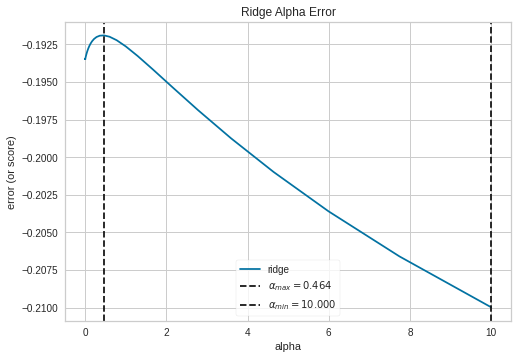

In [198]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    rdg,
    alphas=alphas,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

visualizer.fit(X, y['price_log'])
visualizer.show();

In [199]:
rdg1 = Ridge(alpha=0.464)
rdg1.fit(X_train,y_train['price_log'])
Ridge_score = get_model_score(rdg1)

R-sqaure on training set :  0.9575621731756926
R-square on test set :  0.9583578948032199
RMSE on training set :  0.17944593724714314
RMSE on test set :  0.17933812536880828


In [171]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs1 = SFS(rdg, 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           verbose=5,
           n_jobs=-1, 
           scoring='neg_root_mean_squared_error',
           cv=5)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 264 out of 264 | elapsed:    3.6s finished

[2021-10-24 15:00:56] Features: 1/264 -- score: -3.8453497606231615[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 263 out of 263 | elapsed:    4.0s

[Parallel(n_jobs=1)]: Done 249 out of 249 | elapsed:    4.1s finished

[2021-10-24 15:01:57] Features: 16/264 -- score: -2.7474624586508307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 248 out of 248 | elapsed:    4.4s finished

[2021-10-24 15:02:02] Features: 17/264 -- score: -2.7317105289244994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[Parallel(n_jobs=1)]: Done 233 out of 233 | elapsed:   10.7s finished

[2021-10-24 15:03:43] Features: 32/264 -- score: -2.5939970090060007[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed:   12.2s finished

[2021-10-24 15:03:55] Features: 33/264 -- score: -2.588798744148039[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 217 out of 217 | elapsed:   12.3s finished

[2021-10-24 15:06:40] Features: 48/264 -- score: -2.533569423389284[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    9.6s finished

[2021-10-24 15:06:50] Features: 49/264 -- score: -2.531191380332845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[P

[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   10.8s finished

[2021-10-24 15:09:26] Features: 63/264 -- score: -2.506190583260506[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.4s finished

[2021-10-24 15:09:38] Features: 64/264 -- score: -2.5049566190853243[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed:   10.2s finished

[2021-10-24 15:12:26] Features: 79/264 -- score: -2.4892644261916566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:   10.9s finished

[2021-10-24 15:12:37] Features: 80/264 -- score: -2.488441726811092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[

[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:   15.2s finished

[2021-10-24 15:15:30] Features: 94/264 -- score: -2.478721196890912[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:   11.9s finished

[2021-10-24 15:15:41] Features: 95/264 -- score: -2.478180618566461[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[P

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:   11.6s finished

[2021-10-24 15:18:42] Features: 110/264 -- score: -2.465151066666111[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 154 out of 154 | elapsed:   16.6s finished

[2021-10-24 15:18:59] Features: 111/264 -- score: -2.4647323412104853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:   11.8s finished

[2021-10-24 15:21:53] Features: 126/264 -- score: -2.4590485833518647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed:   10.8s finished

[2021-10-24 15:22:04] Features: 127/264 -- score: -2.458746326532758[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

[Parallel(n_jobs=1)]: Done 124 out of 124 | elapsed:   13.3s finished

[2021-10-24 15:24:58] Features: 141/264 -- score: -2.455773616817228[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 123 out of 123 | elapsed:   12.9s finished

[2021-10-24 15:25:10] Features: 142/264 -- score: -2.455611007288753[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   10.4s finished

[2021-10-24 15:28:04] Features: 157/264 -- score: -2.454012127241946[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:   11.5s finished

[2021-10-24 15:28:16] Features: 158/264 -- score: -2.45391940507733[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   10.8s finished

[2021-10-24 15:30:46] Features: 172/264 -- score: -2.4529236393904315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    9.9s finished

[2021-10-24 15:30:56] Features: 173/264 -- score: -2.4528871794956286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    8.1s finished

[2021-10-24 15:33:24] Features: 188/264 -- score: -2.4525070183775126[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    7.7s finished

[2021-10-24 15:33:32] Features: 189/264 -- score: -2.4524915454186744[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers

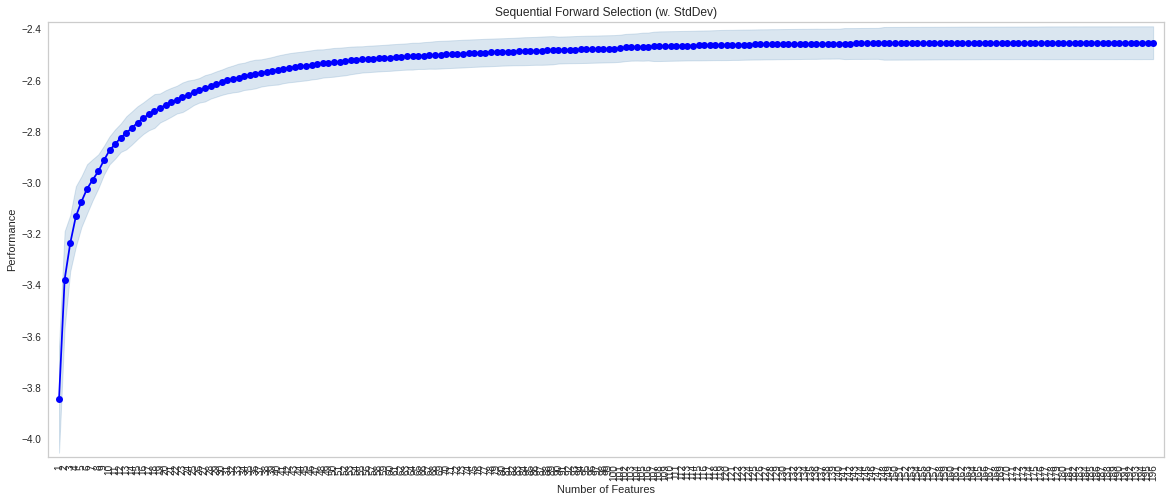

In [186]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(20, 8))

# plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.margins(0.01, 0.01)
plt.grid()
plt.show()

In [187]:
sfs1_df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfs1_df['avg_score'] = sfs1_df['avg_score'].astype(float)
sfs1_df.sort_values('avg_score', ascending=False).head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
196,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...","[-2.3856369963362063, -2.3863483747730516, -2....",-2.452413,"(Year, Mileage, Engine, Power, Seats, New_pric...",0.08238,0.064095,0.032047
195,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...","[-2.3856438255221697, -2.386392457454559, -2.4...",-2.452421,"(Year, Mileage, Engine, Power, Seats, New_pric...",0.082364,0.064082,0.032041
194,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...","[-2.3856442805697404, -2.3863924574545514, -2....",-2.452431,"(Year, Mileage, Engine, Power, Seats, New_pric...",0.082384,0.064098,0.032049
193,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...","[-2.3856515670359952, -2.386392457454551, -2.4...",-2.452440,"(Year, Mileage, Engine, Power, Seats, New_pric...",0.08238,0.064094,0.032047
192,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15,...","[-2.3856623759790208, -2.3864506047822247, -2....",-2.452451,"(Year, Mileage, Engine, Power, Seats, New_pric...",0.082336,0.06406,0.03203


### Decision Tree

In [200]:
dtree = DecisionTreeRegressor(random_state=1)

In [201]:
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [202]:
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999903038539666
R-square on test set :  0.8797834043780918
RMSE on training set :  0.00271241811318959
RMSE on test set :  0.3047112577799368


#### Observations
* Decision Tree is overfitting on the training set and hence not able to generalize well on the test set.

In [203]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.604676
Year                   0.231435
Engine                 0.044731
Mileage                0.016265
kilometers_driven_log  0.014958
...                         ...
Model_cr-v             0.000000
Model_e                0.000000
Model_eeco             0.000000
Model_prius            0.000000
Model_fortwo           0.000000

[264 rows x 1 columns]


#### Observations
* Power, Year and Engine are the top 3 important features of decision tree model.

### Random Forest

In [204]:
rf = RandomForestRegressor(random_state=1, oob_score=True, n_jobs=-1)

In [205]:
rf.fit(X_train,y_train['price_log'])

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=1)

In [206]:
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.9906969362824598
R-square on test set :  0.9448190284649555
RMSE on training set :  0.0840175590209505
RMSE on test set :  0.20644337885435


#### Observations
* Random Forest model has performed well on training and test set.

**Feature Importance**

In [208]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.610134
Year                   0.231673
Engine                 0.037419
kilometers_driven_log  0.017664
Mileage                0.014150
...                         ...
Model_boxster          0.000000
Model_cedia            0.000000
Model_e                0.000000
Model_wr-v             0.000000
Model_platinum         0.000000

[264 rows x 1 columns]


#### Observations
* Power, Year and Engine are the top 3 important features of decision tree model.

### Hyperparameter Tuning - Decision Tree

In [211]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,25,5)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_tuned, 
    parameters, 
    scoring=scorer,
    # scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=5
)

grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=12, random_state=1)

In [212]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9776281539863855
R-square on test set :  0.8903509012279442
RMSE on training set :  0.1302890665753037
RMSE on test set :  0.29101060814062535


In [209]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9776281539863855
R-square on test set :  0.8903509012279442
RMSE on training set :  0.1302890665753037
RMSE on test set :  0.29101060814062535


#### Observations
* Overfitting in decision tree is still there.

**Feature Importance**

In [210]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.616507
Year                   0.235403
Engine                 0.045086
Mileage                0.014358
kilometers_driven_log  0.010394
...                         ...
Model_lancer           0.000000
Model_kwid             0.000000
Model_kuv              0.000000
Model_koleos           0.000000
Model_zest             0.000000

[264 rows x 1 columns]


#### Observations
* Power, Year and Engine are the top 3 important features of decision tree model.

### Hyperparameter Tuning - Random Forest

In [214]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1,oob_score=True)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[5,7,None],
                'max_features': ['sqrt','log2'],
                'n_estimators': [250, 500, 800, 900]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_tuned, 
    parameters, 
    scoring=scorer,
    cv=5,
    n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_features='sqrt', n_estimators=800, oob_score=True,
                      random_state=1)

In [216]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9913230377067657
R-square on test set :  0.9492602745388047
RMSE on training set :  0.08114110487743526
RMSE on test set :  0.19796132126778693


In [224]:
results = pd.DataFrame(grid_obj.cv_results_).drop('params', axis=1)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       24 non-null     float64
 1   std_fit_time        24 non-null     float64
 2   mean_score_time     24 non-null     float64
 3   std_score_time      24 non-null     float64
 4   param_max_depth     16 non-null     object 
 5   param_max_features  24 non-null     object 
 6   param_n_estimators  24 non-null     object 
 7   split0_test_score   24 non-null     float64
 8   split1_test_score   24 non-null     float64
 9   split2_test_score   24 non-null     float64
 10  split3_test_score   24 non-null     float64
 11  split4_test_score   24 non-null     float64
 12  mean_test_score     24 non-null     float64
 13  std_test_score      24 non-null     float64
 14  rank_test_score     24 non-null     int32  
dtypes: float64(11), int32(1), object(3)
memory usage: 2.8+ KB


In [225]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.792001,0.093107,0.046896,0.012125,5,sqrt,250,0.648781,0.667689,0.687855,0.650426,0.671868,0.665324,0.014503,13
1,3.113068,0.105917,0.099824,0.028973,5,sqrt,500,0.645627,0.669261,0.681176,0.655649,0.668136,0.663970,0.012224,14
2,5.158777,0.224601,0.158320,0.039916,5,sqrt,800,0.644155,0.665225,0.678529,0.653772,0.663377,0.661011,0.011548,15
3,5.730037,0.492123,0.132481,0.014953,5,sqrt,900,0.643585,0.664095,0.680023,0.653814,0.663221,0.660948,0.012094,16
4,1.445572,0.085374,0.046364,0.006891,5,log2,250,0.499544,0.512139,0.537714,0.514615,0.515634,0.515929,0.012322,24


In [227]:
def get_test_scores(df):
    """Select parameter values and test scores"""
    data = df.filter(like='param').join(results[['mean_test_score']])
    return data.rename(columns={c: '_'.join(c.split('_')[1:]) for c in data.columns})

In [228]:
test_scores = get_test_scores(results)
test_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   max_depth     16 non-null     object 
 1   max_features  24 non-null     object 
 2   n_estimators  24 non-null     object 
 3   test_score    24 non-null     float64
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


In [229]:
test_scores = test_scores.set_index('test_score').stack().reset_index()
test_scores.columns= ['test_score', 'parameter', 'value']
test_scores.head(3)

,test_score,parameter,value
0,0.665324,max_depth,5
1,0.665324,max_features,sqrt
2,0.665324,n_estimators,250


In [230]:
plot_data = get_test_scores(results)
plot_params = plot_data.columns[:-1].tolist()
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   max_depth     16 non-null     object 
 1   max_features  24 non-null     object 
 2   n_estimators  24 non-null     object 
 3   test_score    24 non-null     float64
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


In [231]:
plot_data.head(3)

,max_depth,max_features,n_estimators,test_score
0,5,sqrt,250,0.665324
1,5,sqrt,500,0.663970
2,5,sqrt,800,0.661011


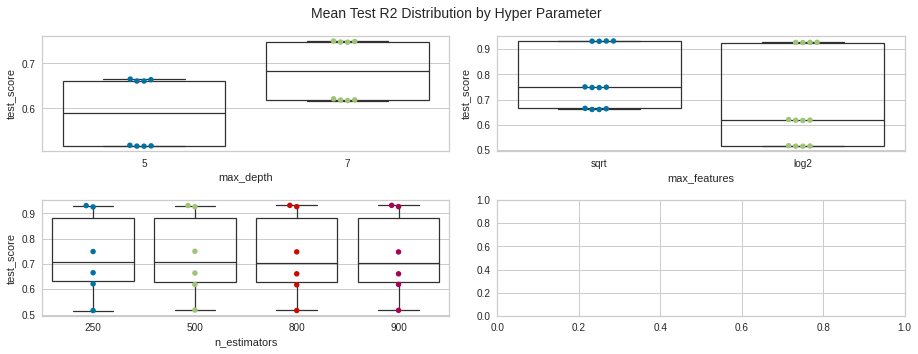

In [233]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(13, 5))
axes = axes.flatten()

for i, param in enumerate(plot_params):
    sns.swarmplot(x=param, y='test_score', data=plot_data, s=5.5, ax=axes[i])
    sns.boxplot(x=param, y='test_score', data=plot_data, linewidth=1.25, 
                boxprops={'facecolor':'None'}, ax=axes[i])
    
fig.suptitle('Mean Test R2 Distribution by Hyper Parameter', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.9)
plt.show()

In [234]:
pd.Series(grid_obj.best_params_)

max_depth       None
max_features    sqrt
n_estimators     800
dtype: object

In [235]:
reg_tree = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
)

In [236]:
data = get_test_scores(results)
params = data.columns[:-1].tolist()
data = pd.get_dummies(data, columns=params, drop_first=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   test_score         24 non-null     float64
 1   max_depth_5        24 non-null     uint8  
 2   max_depth_7        24 non-null     uint8  
 3   max_features_log2  24 non-null     uint8  
 4   max_features_sqrt  24 non-null     uint8  
 5   n_estimators_250   24 non-null     uint8  
 6   n_estimators_500   24 non-null     uint8  
 7   n_estimators_800   24 non-null     uint8  
 8   n_estimators_900   24 non-null     uint8  
dtypes: float64(1), uint8(8)
memory usage: 512.0 bytes


In [237]:
data.tail(3)

,test_score,max_depth_5,max_depth_7,max_features_log2,max_features_sqrt,n_estimators_250,n_estimators_500,n_estimators_800,n_estimators_900
21,0.925809,0,0,1,0,0,1,0,0
22,0.926132,0,0,1,0,0,0,1,0
23,0.926272,0,0,1,0,0,0,0,1


In [238]:
dtree_features = data.drop('test_score', axis=1).columns
reg_tree.fit(X=data[dtree_features], y=data.test_score)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=5,
                      random_state=42)

In [239]:
import graphviz
from sklearn.tree import export_graphviz

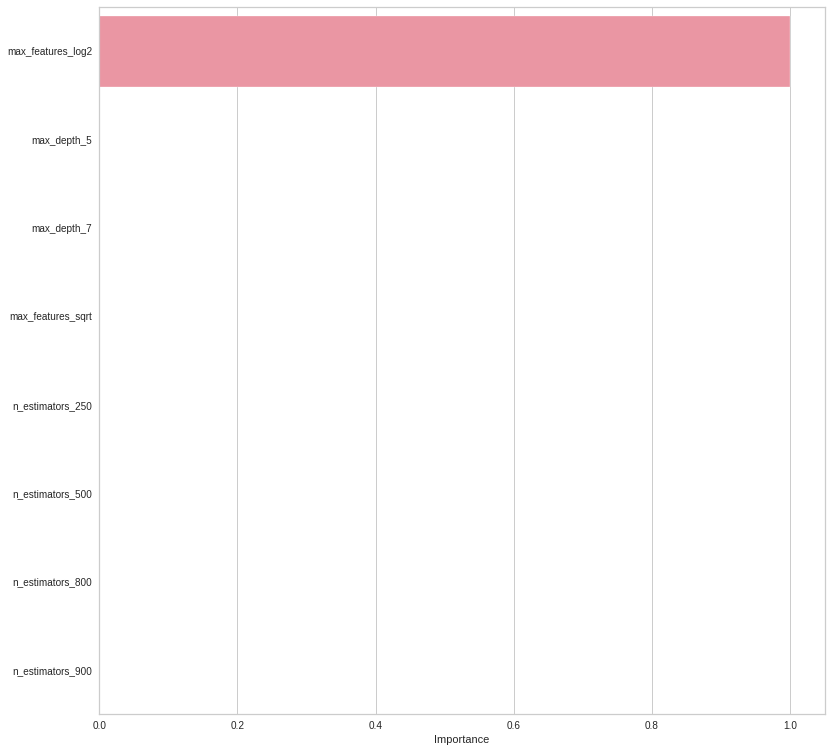

In [242]:
importances = reg_tree.feature_importances_
columns=dtree_features
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index);

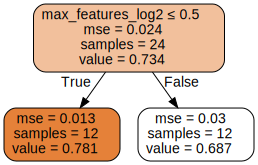

In [240]:
dot_data = export_graphviz(reg_tree,
                           out_file=None,
                           feature_names=dtree_features,
                           max_depth=4,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

In [244]:
from statsmodels.api import OLS, add_constant

In [245]:
data = get_test_scores(results)
params = data.columns[:-1].tolist()
data = pd.get_dummies(data, columns=params, drop_first=True)

model = OLS(endog=data.test_score, exog=add_constant(data.drop('test_score', axis=1))).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                     1.084
Date:                Sun, 24 Oct 2021   Prob (F-statistic):              0.402
Time:                        17:51:00   Log-Likelihood:                 12.827
No. Observations:                  24   AIC:                            -13.65
Df Residuals:                      18   BIC:                            -6.586
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7128      0.10

In [246]:
residual = model.resid 
residual.mean()

-3.3769283665681843e-16

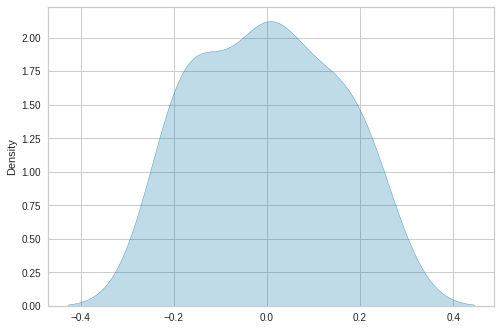

In [247]:
sns.kdeplot(residual, fill=True);

In [249]:
from scipy import stats

t_stat, pval = stats.shapiro(residual)
print(f't_stat: {t_stat} \npval: {pval}')

t_stat: 0.9013437032699585 
pval: 0.022984858602285385


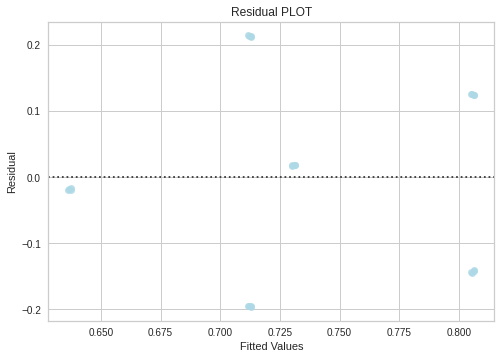

In [250]:
# predicted values
fitted = model.fittedvalues

sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

#### Observations
* There's a slight improvement in the Random Forest model after tuning.

**Feature Importance**

In [226]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Power                0.169530
Engine               0.137160
Year                 0.108752
Transmission_Manual  0.092396
Mileage              0.047379
...                       ...
Model_wr-v           0.000000
Model_beetle         0.000000
Model_cedia          0.000000
Model_boxster        0.000000
Model_a7             0.000000

[264 rows x 1 columns]


#### Observations
* Power, Year and Engine are the top 3 important variables in predicting car price according to Random Forest.

In [221]:
# defining list of models
models = [lr, rdg, dtree, dtree_tuned, rf, rf_tuned, rdg1]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [223]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge Regression','Decision Tree','Tuned Decision Tree','Random Forest', 'Tuned Random Forest', 'Ridge Tuned'], 
                                          'Train_r2': r2_train,
                                 'Test_r2': r2_test,
                                 'Train_RMSE':rmse_train,
                                 'Test_RMSE':rmse_test},
                               ) 

comparison_frame.sort_values('Test_RMSE')

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
6,Ridge Tuned,0.957562,0.958358,0.179446,0.179338
1,Ridge Regression,0.956031,0.958016,0.182654,0.180073
0,Linear Regression,0.958819,0.956760,0.176769,0.182746
5,Tuned Random Forest,0.991323,0.949260,0.081141,0.197961
4,Random Forest,0.990697,0.944819,0.084018,0.206443
3,Tuned Decision Tree,0.977628,0.890351,0.130289,0.291011
2,Decision Tree,0.999990,0.879783,0.002712,0.304711


* Ridge Regression and Linear Regression have performed very well on data. However, Ridge Regression has given a more generalized model on training and test set.
* There's still scope for improvement with tuning the hyperparameters of the Random Forest.


#### **Refined insights**:
**Name:**

- The `Name` column has 2041 unique values and this column would not be very useful in our analysis. 
But the name contains both the brand name and the model name of the vehicle and  we can process this column to extract Brand and Model names to reduce the number of levels.

**Extracting the car brands:**

- After extracting the car brands from the name column we find that the most frequent brand in our data is Maruti and Hyundai.

**Extracting car model name:**

- After extracting the car name it gets clear that our dataset contains used cars from luxury as well as budget-friendly brands.
- The mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in descending order and this output is very close to our expectation (domain knowledge), in terms of brand order.
Towards the bottom end we have more budget friendly brands.

**Important variable with Linear Regression:**
* According to the Linear Regresion model the most significant predictors of the price of used cars are - 
    - Year
    - Power
    - New_price
    - Location
    - Kilometers_Driven
    - Fuel_Type
    - Owner_Type
    - Transmission

**Important variable with Random Forest:**
* According to the Random Forest model the most significant predictors of the price of used cars are 
 - Power of the engine
 -The year of manufacturing
 -Engine
 -Mileage


#### **Proposal for the final solution design**:


* Our final Ridge Regression model has an R-squared of ~0.89 on The test data, which means that our model can explain 89% variation in our data also the RMSE on test data is ~3.62 which means we can predict very closely to the original values. This is a very good model and we can use this model in production. 

#### **Key recommendations for implementation**: 
     
* Newer cars sell for higher prices.
* Mileage is inversely correlated with Price. Generally, high Mileage cars are the lower budget cars. - It is important to note here that correlation is not equal to causation. That is to say, that increase in Mileage does not lead to a drop in prices. It can be understood in such a way that cars with high mileage do not have a high power engine and therefore have low prices.
* Owner_Type plays an important role in determining the price of a used car.
* Automatic Transmission cars are mores costly.

* Buisness can benifit by getting more cars under the hood:

  - From Tier 1 cities
  - First owner cars
  - Automatic transmission cars
  - High engine powered cars
* Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata are very risky and we need to be careful about investments in this area.
* We will have to analyze the cost side of things before we can talk about profitability in the business. We should gather data regarding that.

* The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types.